In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm

#carico i dati del 2023
ff1.Cache.enable_cache('2023Austria') 
fp23 = ff1.get_session(2023, 'Austria', 'Q')
fp23.load()

#carico i dati del 2022
ff1.Cache.enable_cache('2022Austria') 
fp22 = ff1.get_session(2022, 'Austria', 'Q')
fp22.load()

In [6]:
# ricavo i migliori giri del 2023
# non tengo in considerazione Perez in quanto nel 2023 non ha fatto segnare un tempo, idem per STR nel 2022
drivers = pd.unique(fp23.laps['Driver'])
best_laps23 = list()
for driver in drivers:
                best_laps23.append(fp23.laps.pick_driver(driver).pick_fastest())
fastest_laps23 = Laps(best_laps23).sort_values(by='LapTime').reset_index(drop=True)

# ricavo i migliori giri del 2022
drivers = pd.unique(fp22.laps['Driver'])
best_laps22 = list()
for driver in drivers:
                        best_laps22.append(fp22.laps.pick_driver(driver).pick_fastest())
fastest_laps22 = Laps(best_laps22).sort_values(by='LapTime').reset_index(drop=True)

In [7]:
# elimino i piloti che ci son stati solo uno dei due anni 
# dal 2023 elimino: HUL, DEV, PIA, SAR
fastest_laps23 = fastest_laps23[fastest_laps23.Driver != "HUL"]
fastest_laps23 = fastest_laps23[fastest_laps23.Driver != "DEV"]
fastest_laps23 = fastest_laps23[fastest_laps23.Driver != "PIA"]
fastest_laps23 = fastest_laps23[fastest_laps23.Driver != "SAR"]

fastest_laps23 = fastest_laps23[fastest_laps23.Driver != "PER"]
# faccio il sort in ordine alfabetico dei piloti
fastest_laps23 = fastest_laps23.sort_values(by=['Driver'], ascending=True)

# dal 2022 elimino: RIC, MSC, VET, LAT
fastest_laps22 = fastest_laps22[fastest_laps22.Driver != "RIC"]
fastest_laps22 = fastest_laps22[fastest_laps22.Driver != "MSC"]
fastest_laps22 = fastest_laps22[fastest_laps22.Driver != "VET"]
fastest_laps22 = fastest_laps22[fastest_laps22.Driver != "LAT"]

fastest_laps22 = fastest_laps22[fastest_laps22.Driver != "PER"]
# faccio il sort in ordine alfabetico dei piloti
fastest_laps22 = fastest_laps22.sort_values(by=['Driver'], ascending=True)

team_colors = list()
team_color_drvrs = list()
for index, lap in fastest_laps23.iterlaps():
        team_color_drvrs.append(lap['Driver'])
        color = ff1.plotting.team_color(lap['Team'])
        team_colors.append(color)

In [8]:
fastest_laps22 = fastest_laps22.loc[:,["Driver", "LapTime"]]
fastest_laps23 = fastest_laps23.loc[:,["Driver", "LapTime"]]

fastest_laps22.set_index('Driver', inplace=True)
dict_laps22 = fastest_laps22.to_dict()['LapTime']

fastest_laps23.set_index('Driver', inplace=True)
dict_laps23 = fastest_laps23.to_dict()['LapTime']

diff_dict = {key: dict_laps22[key] - dict_laps23.get(key, 0) for key in dict_laps22}
diff_dict

for key, value in diff_dict.items():
    # do something with value
    diff_dict[key] = value.total_seconds()

Text(0.5, 1.0, 'Lap times improvements from 2022 to 2023\nAustrian Grand Prix - Qualifying')

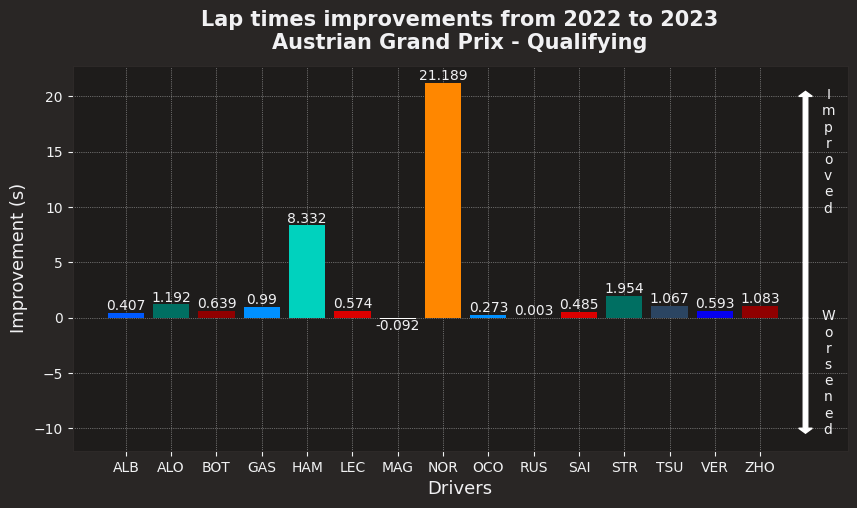

In [18]:
ff1.plotting.setup_mpl()
plt.rcParams['figure.figsize'] = [10, 5]
plt.bar_label(plt.bar(list(diff_dict.keys()), list(diff_dict.values()), color = team_colors))
plt.arrow(15, 0, 0, 20, color="white", width=0.1)
plt.arrow(15, 0, 0, -10, color="white", width=0.1)
plt.text(15.5, 15, '\n'.join("Improved"), va='center', ha='center')
plt.text(15.5, -5, '\n'.join("Worsened"), va='center', ha='center')
plt.xlabel("Drivers", fontsize=13)
plt.ylabel("Improvement (s)", fontsize=13)
plt.grid(visible=True, linestyle=':', linewidth=0.5)
plt.title(f"Lap times improvements from 2022 to 2023\n"
          f"{fp23.event['EventName']} - {fp23.name}", fontsize=15, fontweight='bold')